# EDA for the Titanic DataSet 

In [1]:
#Importing the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#%matplotlib inline is a magic command in Jupyter Notebooks that ensures that Matplotlib plots are displayed inline within the notebook itself, directly below the code cells that produce them.

In [2]:
#Reading the Data
train=pd.read_csv('titanic_train.csv')

In [3]:
#Displaying the Data 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**The main Aim is to Find Whether the Passenger has Surrvied or not based on the Data Available**

# Exploratory Data Analysis



**Starting the EDA By Checking out missing Values**

In [5]:
#isnull()->In Build Function to Detect the null Values in the DataFrame
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
print("We cant Predict the Total Number of the NULL Values by the Above so we Can Use a Seaborn Library to Visualize the NUll Values")

We cant Predict the Total Number of the NULL Values by the Above so we Can Use a Seaborn Library to Visualize the NUll Values


<Axes: >

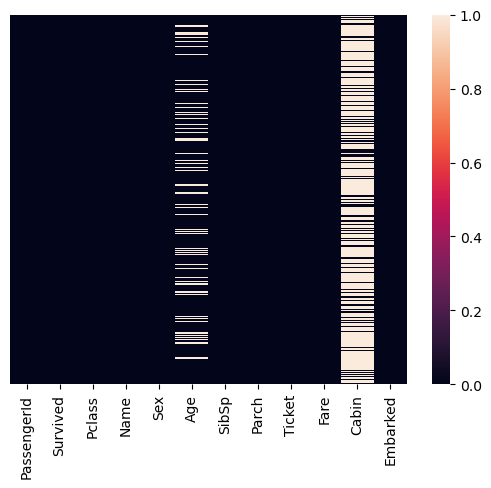

In [7]:
sns.heatmap(train.isnull(),yticklabels=False)

<Axes: >

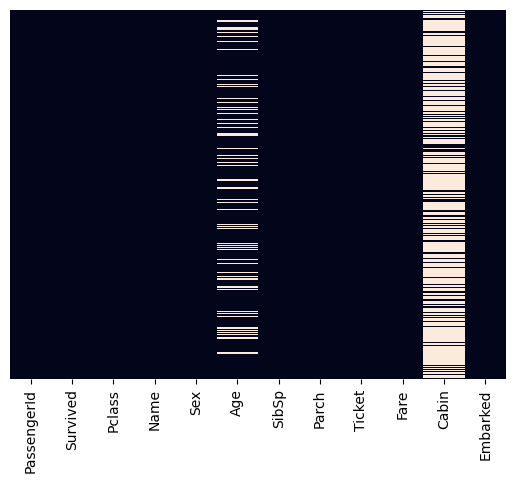

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

<Axes: >

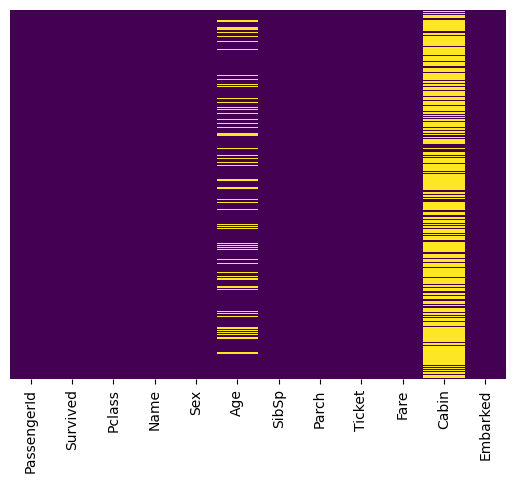

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
print("We mat Observe that most of the NAN Values are present in the Cabin and Age Columns")
print("Some of the Values in the Age are NAN and The Cabin Column Contains most of the NAN Values so we may Delete the Column or Convert as Cabin Knowk:1 or 0")

We mat Observe that most of the NAN Values are present in the Cabin and Age Columns
Some of the Values in the Age are NAN and The Cabin Column Contains most of the NAN Values so we may Delete the Column or Convert as Cabin Knowk:1 or 0


<Axes: xlabel='Survived', ylabel='count'>

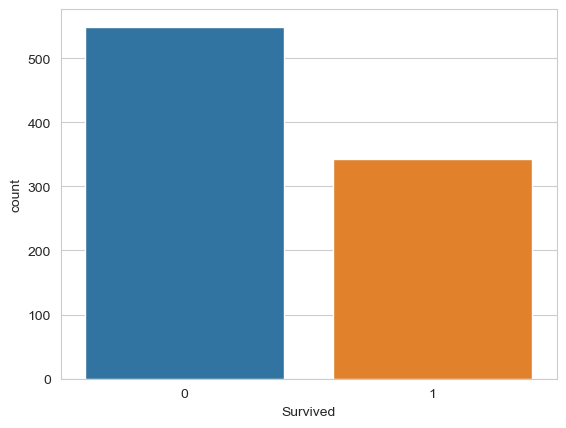

In [11]:
#Setting up a Whitegrid as a Background
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

**WE MAY OBSERVED THAT MOST OF THE PEOPLE MORE THAN 550 HAS NOT SURVIVED,
NUMBER OF THE PEOPLE DIED IS MORE THAN THE NUMBER OF THE PEOPLE SURVIED**

In [12]:
print("Trying to get some more Insights")

Trying to get some more Insights


<Axes: xlabel='Survived', ylabel='count'>

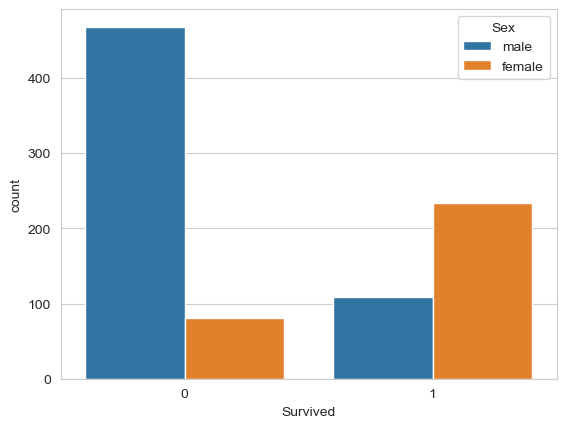

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)
#hue is a parameter:the x axis is Observed based on the hue parameter

In [14]:
print("0:Denotes that the person has Not Survived and 1:denotes that the person has Survived")
print("From the Above Visualization we may Observe that Most of the Men more than 450 has not Survived and very less count of the female has died")
print("Similarly less count of the male have Survived and more count of the female has Survived")

0:Denotes that the person has Not Survived and 1:denotes that the person has Survived
From the Above Visualization we may Observe that Most of the Men more than 450 has not Survived and very less count of the female has died
Similarly less count of the male have Survived and more count of the female has Survived


**Most of the female were Saved compared to male**

<Axes: xlabel='Survived', ylabel='count'>

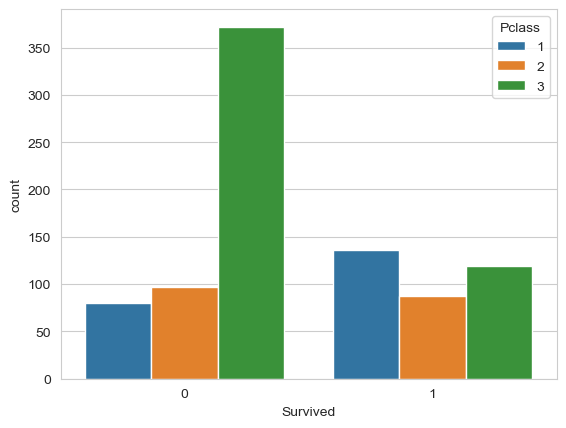

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

**1-First Class,2-Second Class,3-Third Class:We May Observe that Very less Number of the People from the First Class have not Survived Following is the Second and and The Third Class**


# Finding the Average Age of the people present in the Ship

**Here we are Using a Histogram to Visualize the Dustribution**

<Axes: xlabel='Age'>

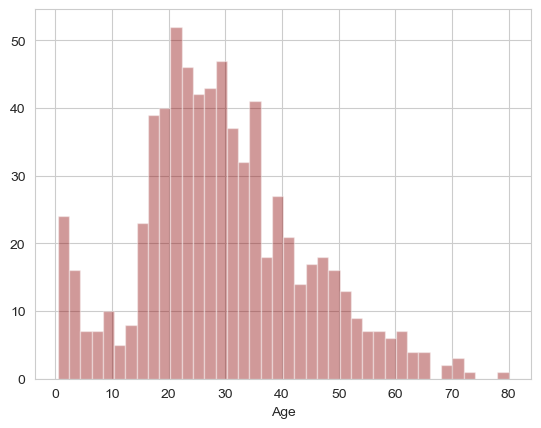

In [16]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)
#dropna():To Drop the NAN Values in the Age as we have Observed Earlier that the Age Column has Some NAN Values

In [17]:
print("We may Observe that the Average Age of the People present in the Ship Lies Between 17-30")

We may Observe that the Average Age of the People present in the Ship Lies Between 17-30


In [18]:
#To Know the Count of the Sibilings and Spouse and Train Fare
#sns.countplot(x="SibSp",data=train)
#train['Fare'].hist(color="green",bins=40,figsize=(8,4))

# Data Cleaning

**We Observe that there is a relationship Between the Age and Pclass Atttributes**

<Axes: xlabel='Pclass', ylabel='Age'>

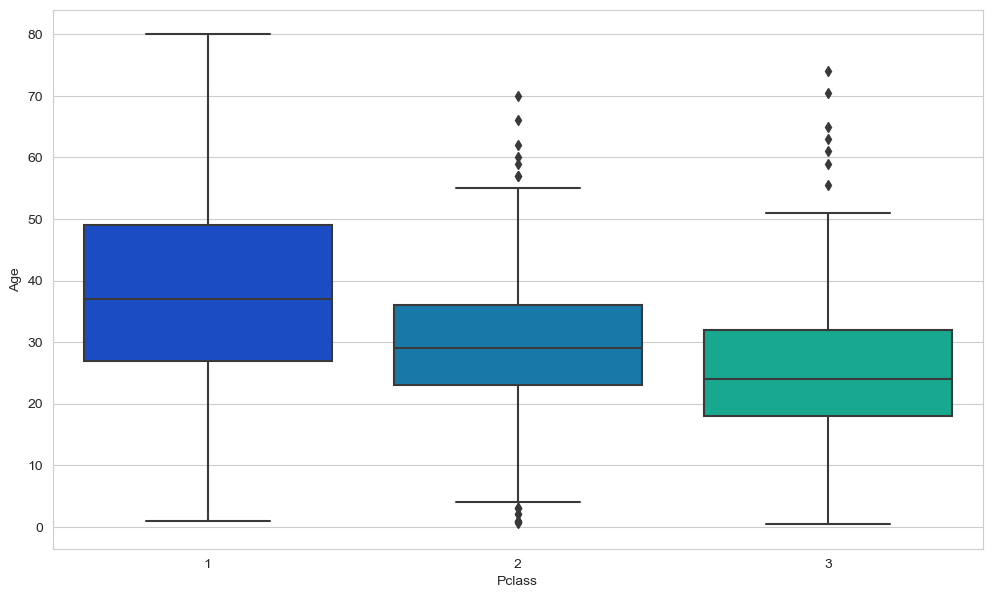

In [19]:
plt.figure(figsize=(12,7))#Specifying the Size of the Plot
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')#palette is the Color

**We Observe that for the Pclass 1,Average Age of the People is around 37 and for the Pclass 2,Average Age of the People is Around 29 and for the Pclass 3,Average Age of the People is Around 24**

**Replacing the Age Values with the Above Observation**

In [20]:
def impute_age(cols):#cols expects to be a list or a series that contain two elements
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [21]:
print("Now Applying the Function")

Now Applying the Function


In [22]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

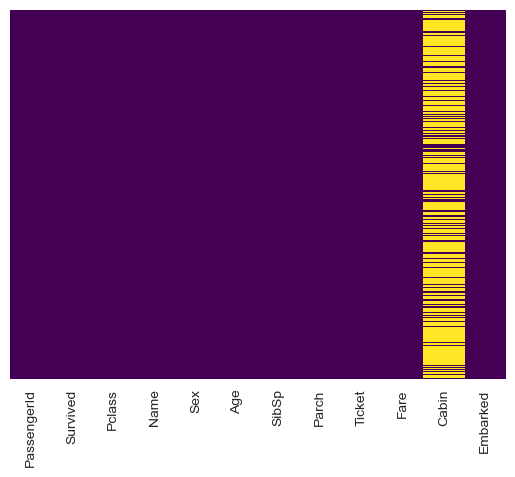

In [23]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Now we can see that the NAN Values in the Age are Replaced**

In [24]:
print("The Cabin Column has More Number of NAN Values So its Better to Drop the Column")

The Cabin Column has More Number of NAN Values So its Better to Drop the Column


**Drop the Cabin Column**

In [25]:
train.drop('Cabin',axis=1,inplace=True)#axis=1:Dropping a Column

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

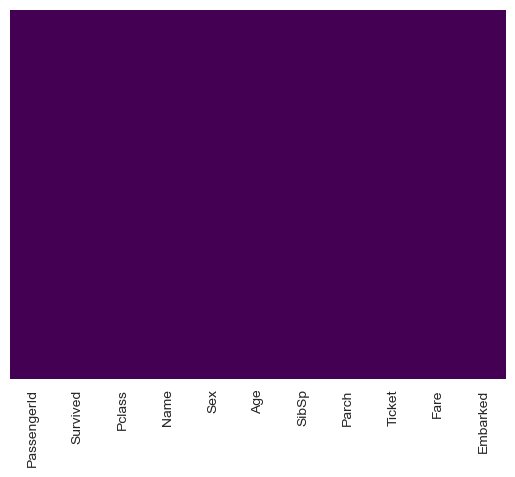

In [27]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Now we can see that there are no NAN Values**

**WE HAVE HANDELED ALL THE NAN VALUES**

# Converting the Categorical Features

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [29]:
embark= pd.get_dummies(train['Embarked'], drop_first=True).astype(int)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [30]:
sex=pd.get_dummies(train['Sex'],drop_first=True).astype(int)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


**Dropping the Unnecessary Colums**

In [31]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [33]:
train=pd.concat([train,sex,embark],axis=1)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
